In [1]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

# 경고 메세지 숨기기 
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 11.0
plt.rcParams['font.family'] = 'Malgun Gothic'


# Quiz1 : 인구수와  CCTV 

```
1) CCTV_in_Seoul.csv 파일을 데이타프레임으로 생성하여라
2) 기관명을 구별로 컬럼명을 변경하여라 
3) 최근증가율 컬럼을 추가하여라.
  최근증가율 = ((2016+2015+2014) / 2013년도이전)*100 
4) population_in_Seoul.xls 파일을 데이타프레임으로 생성하여라 
( header=2, usecols=B,D,G,J,N') 으로 한다. 

5) 4번의 데이타프레임에서 컬럼명을 변경하여라 
  구별, 인구수, 한국인, 외국인, 고령자 
6) 4번의 데이타프레임에서 1행과 결측값이 있는 행을 삭제하여라 
7) 4번의 데이타프레임에서 외국인 비율과 고령자 비율의 컬럼을 추가하여라.
8) 3번의 데이타프레임과 7번의 데이타프레임을 
   구별 컬럼을 기준으로 이너조인하여라 
   
   pd.merge(left = DF1 , right = DF2, how = "inner", on = "공통컬럼이름")
   
9) 8번의 데이타프레임에서 년도 컬럼을 모두 삭제하여라
10) 구별 컬럼을 인덱스로 변경하여라 
11) cctv 수치를 기준으로 가로막대 그래프를 출력하여라
12) 외국인 비율이 가장 많은 구 3개를 파이 그래프 형태로 출력하여라. 
(파이그래프 표시 형태 => 한국인과 외국인 비율)

```

In [20]:
# 1) CCTV_in_Seoul.csv 파일을 데이타프레임으로 생성하여라
df = pd.read_csv('data/CCTV_in_Seoul.csv')
df.sample(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
12,마포구,574,314,118,169,379
2,강북구,748,369,120,138,204
8,노원구,1265,542,57,451,516


In [21]:
df.shape

(25, 6)

In [22]:
df.dtypes

기관명          object
소계            int64
2013년도 이전     int64
2014년         int64
2015년         int64
2016년         int64
dtype: object

In [23]:
df.isnull().sum()

기관명          0
소계           0
2013년도 이전    0
2014년        0
2015년        0
2016년        0
dtype: int64

In [24]:
# 2) 기관명을 구별로 컬럼명을 변경하여라 
df.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [25]:
df.rename?

In [26]:
# df.rename(columns={"기관명": "구별"}, inplace=True)
df = df.rename(columns={"기관명": "구별"})

In [27]:
df.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [28]:
# 3) 최근증가율 컬럼을 추가하여라.
#   최근증가율 = ((2016+2015+2014) / 2013년도이전)*100 

df['최근증가율'] = ((df['2014년'] + df['2015년'] + df['2016년'])/df['2013년도 이전'])*100

In [29]:
df.sample(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
6,구로구,1561,1142,173,246,323,64.973730
5,광진구,707,573,78,53,174,53.228621
20,용산구,1624,1368,218,112,398,53.216374


In [30]:
df.dtypes

구별            object
소계             int64
2013년도 이전      int64
2014년          int64
2015년          int64
2016년          int64
최근증가율        float64
dtype: object

In [137]:
# 4) population_in_Seoul.xls 파일을 데이타프레임으로 생성하여라 
# ( header=2, usecols=B,D,G,J,N') 으로 한다.


df_pop = pd.read_excel('data/population_in_Seoul.xls', header=2, usecols='B,D,G,J,N')
df_pop.sample(3)

,자치구,계,계.1,계.2,65세이상고령자
12,은평구,494388.0,489943.0,4445.0,72334.0
4,성동구,311244.0,303380.0,7864.0,39997.0
21,관악구,525515.0,507203.0,18312.0,68082.0


In [138]:
df_pop.shape

(27, 5)

In [139]:
df_pop.isnull().sum()

자치구         1
계           1
계.1         1
계.2         1
65세이상고령자    1
dtype: int64

In [140]:
# 5) 4번의 데이타프레임에서 컬럼명을 변경하여라 
#   구별, 인구수, 한국인, 외국인, 고령자 

In [141]:
# 구별, 인구수, 한국인, 외국인, 고령자
df_pop.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
df_pop.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [142]:
# 6) 4번의 데이타프레임에서 1행과 결측값이 있는 행을 삭제하여라 


In [143]:
df_pop.head(2)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


In [144]:
df_pop.tail(2)

,구별,인구수,한국인,외국인,고령자
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [145]:
df_pop.isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [146]:
df_pop.dropna?

In [147]:
# 맨마지막 행 삭제 
df_pop.dropna(how='all', inplace=True)

In [148]:
df_pop.isnull().sum()

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

In [149]:
df_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [150]:
# 1행 삭제 
df_pop.drop([0], inplace=True)

In [151]:
df_pop.head(2)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [152]:
df_pop.shape

(25, 5)

In [153]:
df.shape

(25, 7)

In [154]:
# 7) 4번의 데이타프레임에서 외국인 비율과 고령자 비율의 컬럼을 추가하여라.
df_pop['외국인 비율'] = df_pop['외국인']/df_pop['인구수']
df_pop['고령자 비율'] = df_pop['고령자']/df_pop['인구수']
df_pop.head(3)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,0.056695,0.156154
2,중구,133240.0,124312.0,8928.0,20764.0,0.067007,0.155839
3,용산구,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364


In [155]:
# 8) 3번의 데이타프레임과 7번의 데이타프레임을 구별 컬럼을 기준으로 이너조인하여라 
# pd.merge(left = DF1 , right = DF2, how = "inner", on = "공통컬럼이름")

df2 = pd.merge(left = df , right = df_pop, how = "inner", on = "구별")

In [156]:
df.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년', '최근증가율'], dtype='object')

In [157]:
df_pop.columns

Index(['구별', '인구수', '한국인', '외국인', '고령자', '외국인 비율', '고령자 비율'], dtype='object')

In [158]:
pd.merge?

In [159]:
df2.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [160]:
df2.shape

(25, 13)

In [161]:
# 9) 8번의 데이타프레임에서 년도 컬럼을 모두 삭제하여라
df2.drop(columns=['2013년도 이전', '2014년', '2015년', '2016년'], axis=1, inplace=True)

In [162]:
df2.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [163]:
# 10) 구별 컬럼을 인덱스로 변경하여라 


In [164]:
df2.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.009298,0.120516
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,0.010618,0.166003
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,0.010805,0.120158
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553


In [165]:
# 소계 컬럼값을 기준으로 정렬 
df2.sort_values(by='소계', ascending=False, inplace=True)

In [166]:
df2.set_index('구별', inplace=True)

In [167]:
df2

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.008677,0.110722
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.008394,0.110370
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.009585,0.114883
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.008991,0.146310
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,0.060388,0.148364
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,0.070080,0.126895
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,0.034846,0.129553
성북구,1464,63.627354,461260.0,449773.0,11487.0,64692.0,0.024904,0.140251
동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,0.041724,0.146613


In [168]:
# 11) cctv 수치를 기준으로 가로막대 그래프를 출력하여라
df2['소계'].sort_values(ascending=False)

구별
강남구     2780
양천구     2034
서초구     1930
은평구     1873
용산구     1624
구로구     1561
관악구     1496
성북구     1464
동대문구    1294
노원구     1265
동작구     1091
성동구     1062
금천구     1015
종로구     1002
서대문구     962
영등포구     904
강서구      884
강동구      773
강북구      748
광진구      707
중구       671
중랑구      660
송파구      618
마포구      574
도봉구      485
Name: 소계, dtype: int64

In [169]:
df2['소계']

구별
강남구     2780
양천구     2034
서초구     1930
은평구     1873
용산구     1624
구로구     1561
관악구     1496
성북구     1464
동대문구    1294
노원구     1265
동작구     1091
성동구     1062
금천구     1015
종로구     1002
서대문구     962
영등포구     904
강서구      884
강동구      773
강북구      748
광진구      707
중구       671
중랑구      660
송파구      618
마포구      574
도봉구      485
Name: 소계, dtype: int64

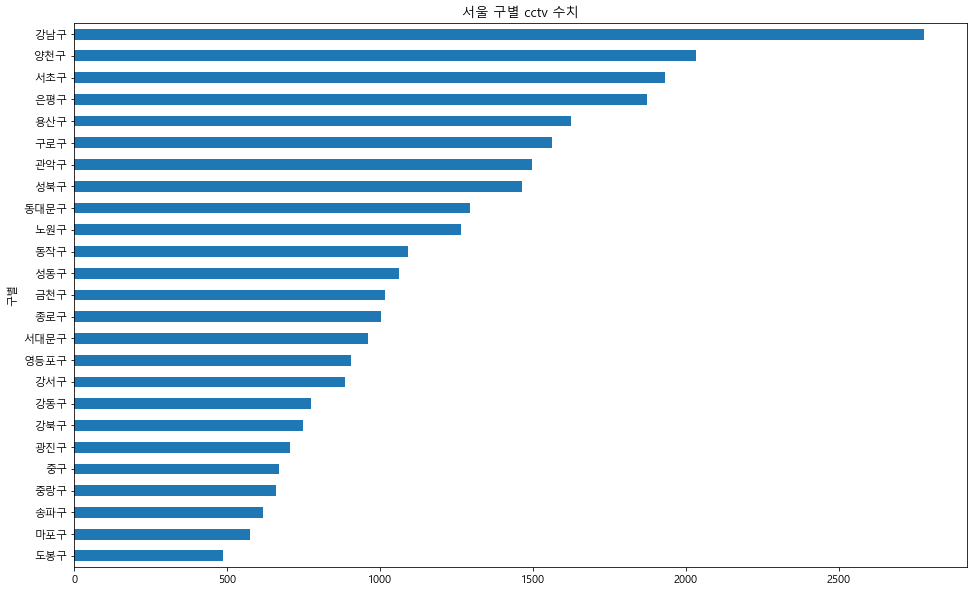

In [170]:
df2['소계'].sort_values(ascending=True).plot( kind='barh', 
                                                    figsize=(16,10), 
                                                    label='CCTV 수치', title='서울 구별 cctv 수치',
                                                    );

In [171]:
# ax = df2['소계'].sort_values(ascending=True).plot( kind='barh', 
#                                                     figsize=(16,10), 
#                                                     label='CCTV 수치', title='서울 구별 cctv 수치',
#                                                     )
# # ax.legend(loc='upper right')

# # 축 제목 설정
# ax.set_xlabel('CCTV');
# ax.set_ylabel('구');



In [172]:
# 12) 외국인 비율이 가장 많은 구 3개를 파이 그래프 형태로 출력하여라. 
# (파이그래프 표시 형태 => 한국인과 외국인 비율)

In [173]:
# 외국인 비율이 가장 많은 구
df2['외국인 비율'].sort_values(ascending=False)

구별
영등포구    0.086636
금천구     0.073423
구로구     0.070080
중구      0.067007
용산구     0.060388
종로구     0.056695
동대문구    0.041724
광진구     0.040179
서대문구    0.037232
관악구     0.034846
동작구     0.029245
마포구     0.028444
성동구     0.025266
성북구     0.024904
중랑구     0.011148
강서구     0.010805
강북구     0.010618
송파구     0.010336
서초구     0.009585
강동구     0.009298
은평구     0.008991
강남구     0.008677
양천구     0.008394
노원구     0.006707
도봉구     0.005785
Name: 외국인 비율, dtype: float64

In [174]:
index_list = df2['외국인 비율'].sort_values(ascending=False).index[:3]
index_list

Index(['영등포구', '금천구', '구로구'], dtype='object', name='구별')

<Figure size 432x288 with 0 Axes>

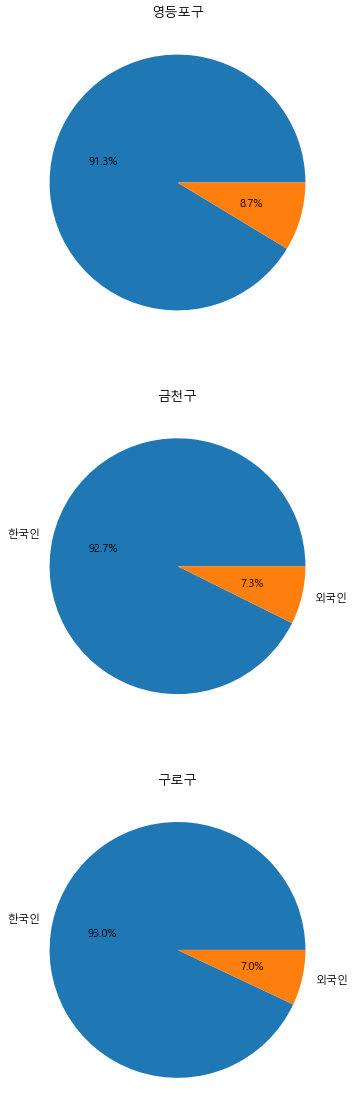

In [175]:
fig = plt.figure();
fig, ax = plt.subplots(3,1, figsize=(20,20));
ax[0].pie(df2.loc[index_list[0], ['한국인','외국인']], autopct='%1.1f%%' );
ax[1].pie(df2.loc[index_list[1], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%');
ax[2].pie(df2.loc[index_list[2], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%');
ax[0].set_title(index_list[0]);
ax[1].set_title(index_list[1]);
ax[2].set_title(index_list[2]);
# plt.suptitle('외국인 비율 TOP3');
# plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=1);
plt.show();

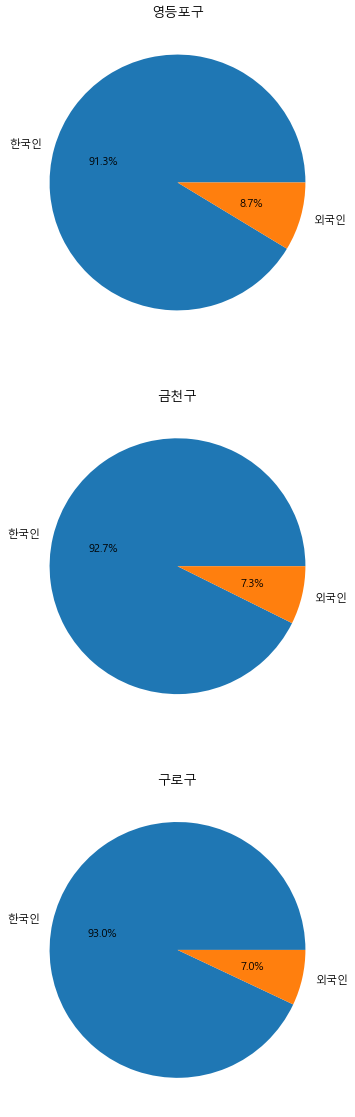

In [176]:
fig = plt.figure(figsize=(20,20));

plt.subplot(311)
plt.pie(df2.loc[index_list[0], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
plt.title(index_list[0])

plt.subplot(312)
plt.pie(df2.loc[index_list[1], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
plt.title(index_list[1])

plt.subplot(313)
plt.pie(df2.loc[index_list[2], ['한국인','외국인']], labels=['한국인','외국인'], autopct='%1.1f%%' );
plt.title(index_list[2])

# plt.suptitle('외국인 비율 TOP3');

plt.show();

# 퀴즈2

In [224]:
# 1) gapminder.tsv 파일을 데이타프레임을 생성하여라 
df_gap = pd.read_csv('data/gapminder.tsv', sep='\t')
df_gap

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [225]:
# 2) 'year' 컬럼을 '년도-01-01' 형태로 변경하여라 
df_gap['year'] = df_gap['year'].apply(lambda x:str(x)+'-01-01')

In [226]:
df_gap['year'].unique()

array(['1952-01-01', '1957-01-01', '1962-01-01', '1967-01-01',
       '1972-01-01', '1977-01-01', '1982-01-01', '1987-01-01',
       '1992-01-01', '1997-01-01', '2002-01-01', '2007-01-01'],
      dtype=object)

In [227]:
df_gap.dtypes

country       object
continent     object
year          object
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [228]:
# 3) 'year' 컬럼을 시계열 데이타로 형변환하여라 
df_gap['year'] = pd.to_datetime(df_gap['year'])
df_gap['year']

0      1952-01-01
1      1957-01-01
2      1962-01-01
3      1967-01-01
4      1972-01-01
          ...    
1699   1987-01-01
1700   1992-01-01
1701   1997-01-01
1702   2002-01-01
1703   2007-01-01
Name: year, Length: 1704, dtype: datetime64[ns]

In [229]:
df_gap.dtypes

country              object
continent            object
year         datetime64[ns]
lifeExp             float64
pop                   int64
gdpPercap           float64
dtype: object

In [230]:
# 4) 'year' 컬럼을 이용하여 2002년도 데이타 추출하고 별도의 데이타프레임 df_gap2002 로 복사하여라. 

df_gap2002 = df_gap[df_gap['year'] == '2002']

In [231]:
df_gap2002.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1654,Vietnam,Asia,2002-01-01,73.017,80908147,1764.456677
1666,West Bank and Gaza,Asia,2002-01-01,72.370,3389578,4515.487575
1678,"Yemen, Rep.",Asia,2002-01-01,60.308,18701257,2234.820827
1690,Zambia,Africa,2002-01-01,39.193,10595811,1071.613938
1702,Zimbabwe,Africa,2002-01-01,39.989,11926563,672.038623


In [232]:
df_gap2002.shape

(142, 6)

In [185]:
# 5) 4번에서 생성한 df_gap2002 데이타프레임에서 기대수명(lifeExp) 컬럼의 값이 
# 가장 낮은 3개국과 가장 높은 3개국 나라의 
#   데이타를 그래프로 출력하여라 

In [239]:
df_result = df_gap2002.sort_values(by='lifeExp')[['country', 'lifeExp']]
df_result.index

Int64Index([1690, 1702,   46, 1354,   10,  262, 1294,  898, 1462, 1042,
            ...
             766,  250, 1426, 1474,  778,   70,  694, 1486,  670,  802],
           dtype='int64', length=142)

In [240]:
df_result

,country,lifeExp
1690,Zambia,39.193
1702,Zimbabwe,39.989
46,Angola,41.003
1354,Sierra Leone,41.012
10,Afghanistan,42.129
...,...,...
70,Australia,80.370
694,Iceland,80.500
1486,Switzerland,80.620
670,"Hong Kong, China",81.495


In [241]:
# 기대수명이 가장 높은 3나라
df_result.index[-3:]

Int64Index([1486, 670, 802], dtype='int64')

In [242]:
# 기대수명이 가장 낮은 3나라
df_result.index[:3]

Int64Index([1690, 1702, 46], dtype='int64')

In [243]:
# 기대수명이 가장 높은 3나라 + 기대수명이 가장 낮은 3나라
index_list = list(df_result.index[:3]) + list(df_result.index[-3:])
index_list 

[1690, 1702, 46, 1486, 670, 802]

In [247]:
df_result2 = df_result.loc[index_list]
df_result2

,country,lifeExp
1690,Zambia,39.193
1702,Zimbabwe,39.989
46,Angola,41.003
1486,Switzerland,80.620
670,"Hong Kong, China",81.495
802,Japan,82.000


In [252]:
# df_result2.index=df_result2['country']
# df_result2

,country,lifeExp
country,,
Zambia,Zambia,39.193
Zimbabwe,Zimbabwe,39.989
Angola,Angola,41.003
Switzerland,Switzerland,80.620
"Hong Kong, China","Hong Kong, China",81.495
Japan,Japan,82.000


In [256]:
# df_result2.set_index('country', inplace=True)

In [257]:
df_result2.sample(6)

,lifeExp
country,
Zimbabwe,39.989
Japan,82.000
Zambia,39.193
Angola,41.003
"Hong Kong, China",81.495
Switzerland,80.620


In [258]:
df_result2

,lifeExp
country,
Zambia,39.193
Zimbabwe,39.989
Angola,41.003
Switzerland,80.620
"Hong Kong, China",81.495
Japan,82.000


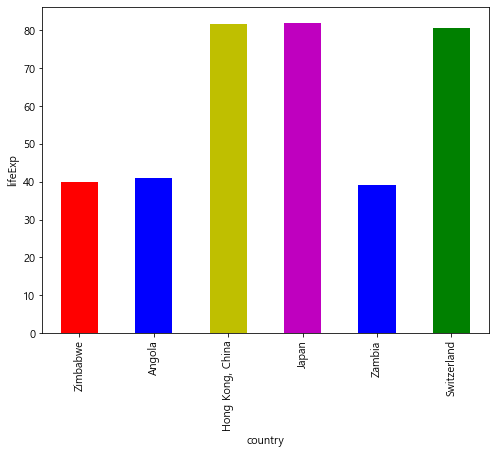

In [260]:
df_result2['lifeExp'].sample(6).plot(kind='bar', 
                                     figsize=(8,6), 
                                     ylabel='lifeExp', 
                                     color=['r','b','y','m','b','g'])
# plt.xticks(rotation=45)
plt.show()

In [261]:
# 6) 대륙별로 몇개국으로 구성되었는지 그래프로 출력하여라 
df_gap['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

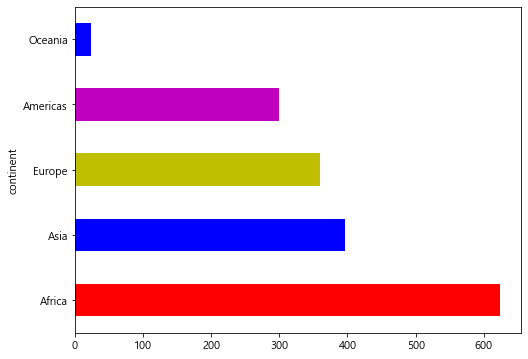

In [262]:
df_gap['continent'].value_counts().plot(kind='barh', figsize=(8,6), 
                                        xlabel='continent', 
                                        color=['r','b','y','m','b']);

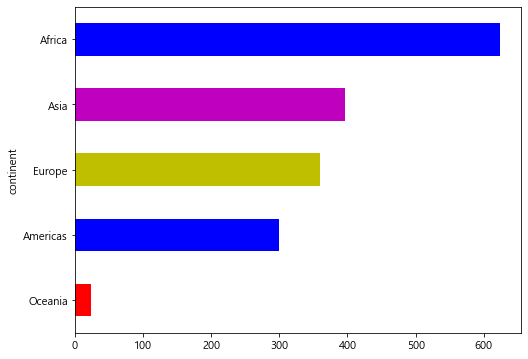

In [263]:
df_gap['continent'].value_counts()[::-1].plot(kind='barh', figsize=(8,6), 
                                        xlabel='continent', 
                                        color=['r','b','y','m','b']);

In [198]:
# 7) gdpPercap 컬럼값이 가장 높은 나라의 데이타를 그래프로 출력하여라. 
county_name = df_gap[df_gap['gdpPercap'] == df_gap['gdpPercap'].max()]['country']
county_name

853    Kuwait
Name: country, dtype: object

In [264]:
df_gap['gdpPercap'].max()

113523.1329

In [203]:
county_name[county_name.index[0]]

'Kuwait'

In [204]:
# df_gap_Kuwait = df_gap[df_gap['country'] == county_name[853]]
df_gap_Kuwait = df_gap[df_gap['country'] == county_name[county_name.index[0]]]

In [205]:
df_gap_Kuwait

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952-01-01,55.565,160000,108382.35290
853,Kuwait,Asia,1957-01-01,58.033,212846,113523.13290
854,Kuwait,Asia,1962-01-01,60.470,358266,95458.11176
855,Kuwait,Asia,1967-01-01,64.624,575003,80894.88326
856,Kuwait,Asia,1972-01-01,67.712,841934,109347.86700
857,Kuwait,Asia,1977-01-01,69.343,1140357,59265.47714
858,Kuwait,Asia,1982-01-01,71.309,1497494,31354.03573
859,Kuwait,Asia,1987-01-01,74.174,1891487,28118.42998
860,Kuwait,Asia,1992-01-01,75.190,1418095,34932.91959
861,Kuwait,Asia,1997-01-01,76.156,1765345,40300.61996


In [206]:
df_gap_Kuwait['year'] = df_gap_Kuwait['year'].dt.year

In [207]:
df_gap_Kuwait

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700
857,Kuwait,Asia,1977,69.343,1140357,59265.47714
858,Kuwait,Asia,1982,71.309,1497494,31354.03573
859,Kuwait,Asia,1987,74.174,1891487,28118.42998
860,Kuwait,Asia,1992,75.190,1418095,34932.91959
861,Kuwait,Asia,1997,76.156,1765345,40300.61996


In [266]:
df_gap_Kuwait.set_index('year', inplace=True)
df_gap_Kuwait

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952,Kuwait,Asia,55.565,160000,108382.35290
1957,Kuwait,Asia,58.033,212846,113523.13290
1962,Kuwait,Asia,60.470,358266,95458.11176
1967,Kuwait,Asia,64.624,575003,80894.88326
1972,Kuwait,Asia,67.712,841934,109347.86700
1977,Kuwait,Asia,69.343,1140357,59265.47714
1982,Kuwait,Asia,71.309,1497494,31354.03573
1987,Kuwait,Asia,74.174,1891487,28118.42998
1992,Kuwait,Asia,75.190,1418095,34932.91959


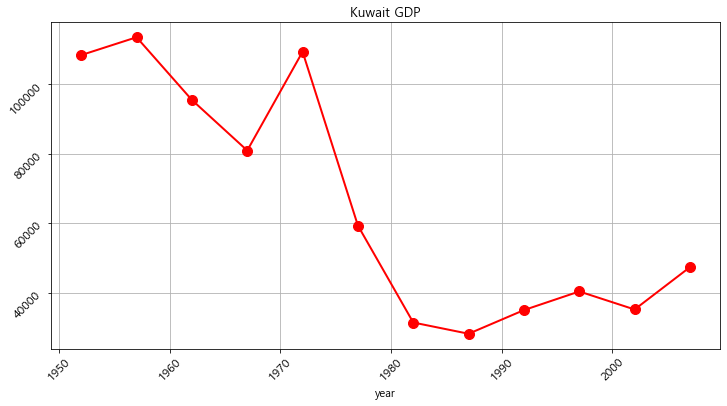

In [209]:
df_gap_Kuwait['gdpPercap'].plot(color='r', linewidth=2, marker='o', markersize=10, grid=True, 
                                figsize=(12,6), xlabel='year', title='Kuwait GDP')
plt.tick_params(labelsize=12, rotation=45)
plt.xticks = list(df_gap_Kuwait.index)

In [212]:
# 8) 한국 데이타 프레임 생성 후 아래와 같이 lifeExp, gdpPercap 컬럼의 그래프를 아래와 같은 형태로 출력하여라. 
# Korea, Rep.        Korea, Dem. Rep.


In [213]:
df_gap.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [214]:
df_kor = df_gap[df_gap['country'] == 'Korea, Rep.']
df_kor

,country,continent,year,lifeExp,pop,gdpPercap
840,"Korea, Rep.",Asia,1952-01-01,47.453,20947571,1030.592226
841,"Korea, Rep.",Asia,1957-01-01,52.681,22611552,1487.593537
842,"Korea, Rep.",Asia,1962-01-01,55.292,26420307,1536.344387
843,"Korea, Rep.",Asia,1967-01-01,57.716,30131000,2029.228142
844,"Korea, Rep.",Asia,1972-01-01,62.612,33505000,3030.876650
845,"Korea, Rep.",Asia,1977-01-01,64.766,36436000,4657.221020
846,"Korea, Rep.",Asia,1982-01-01,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987-01-01,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992-01-01,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997-01-01,74.647,46173816,15993.527960


In [268]:
df_kor.set_index('year', inplace=True)
df_kor

,country,continent,lifeExp,pop,gdpPercap
year,,,,,
1952-01-01,"Korea, Rep.",Asia,47.453,20947571,1030.592226
1957-01-01,"Korea, Rep.",Asia,52.681,22611552,1487.593537
1962-01-01,"Korea, Rep.",Asia,55.292,26420307,1536.344387
1967-01-01,"Korea, Rep.",Asia,57.716,30131000,2029.228142
1972-01-01,"Korea, Rep.",Asia,62.612,33505000,3030.876650
1977-01-01,"Korea, Rep.",Asia,64.766,36436000,4657.221020
1982-01-01,"Korea, Rep.",Asia,67.123,39326000,5622.942464
1987-01-01,"Korea, Rep.",Asia,69.810,41622000,8533.088805
1992-01-01,"Korea, Rep.",Asia,72.244,43805450,12104.278720


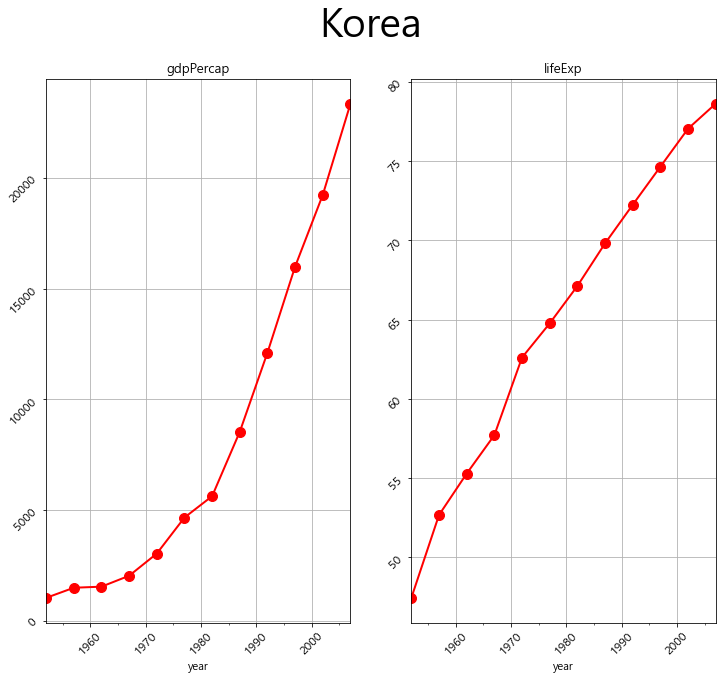

In [269]:
plt.figure(figsize=(12,10))

plt.subplot(121)
df_kor['gdpPercap'].plot(color='r', linewidth=2, marker='o', 
                         markersize=10, grid=True, xlabel='year', title='gdpPercap')
plt.tick_params(labelsize=12, rotation=45)
plt.xticks = list(df_kor.index)

plt.subplot(122)
df_kor['lifeExp'].plot(color='r', linewidth=2, marker='o', markersize=10, grid=True, 
                                xlabel='year', title='lifeExp')
plt.tick_params(labelsize=12, rotation=45)
plt.xticks = list(df_kor.index)

plt.suptitle('Korea', fontsize=40)
plt.show()